# Activité 4 : la chasse au ~bison~ boson de Higgs !

Dans les activités précédentes, vous avez travaillé sur la notion de masse invariante, ainsi que sur la nature statistique de la détection d'une particule instable. En effet, seuls les produits de désintégration de cette dernière sont reconstruits et identifiés. La masse invariante des produits de désintégration donne accès à la masse invariante de la particule qui s'est désintégrée.

**Cette activité consiste à reproduire de façon simplifiée la recherche du boson de Higgs.**

Le "Modèle Standard de la physique des particules" est la théorie qui décrit notre compréhension actuelle de ce domaine. Elle s'appuie sur la mécanique quantique et la relativité restreinte. Au coeur du Modèle Standard se niche le "mécanisme de Higgs", qui décrit l'origine de la masse des bosons $W^\pm$ et Z. De plus, il prédit l'existence d'une particule supplémentaire, le "boson de Higgs". Dans cette théorie, la masse des particules constituant la matière (les fermions) provient de leur interaction avec le boson de Higgs.

L'existence du boson de Higgs a été prédite dès 1964, et plusieurs générations de physiciens et d'expériences ont tenté de le découvrir. Cette découverte a été réalisée au LHC en exploitant les collisions de protons effectuées en 2011 et 2012.

## 1) Importation des outils et des données

In [1]:
# Importation des outils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

Le boson de Higgs (H) est instable : son temps de vie est de l'ordre de $10^{-22}$ s. 
Seuls ses produits de désintégration sont détectables. Nous nous concentrerons ici sur le "canal de désintégration" suivant : $H \rightarrow ZZ \rightarrow \ell^{+}\ell^{-}\ell^{+}\ell^{-}$. 

Le boson H se désintègre d'abord en deux bosons Z, qui se désintègrent chacun en paire de "leptons" de charge opposée, notés $\ell^\pm$. Il s'agit ici de paires d'électrons ($e^+ e^- $) et de muons ($\mu^+ \mu^-$).

_Remarque : en physique des particules, les positrons sont souvent nommés électrons par abus de langage, car ce sont les mêmes algorithmes qui leur sont appliqués, et leur signature dans le détecteur est identique, mis à part le sens de rotation induit par le champ magnétique._

Importons des échantillons de données enregistrées en 2011 et en 2012.

In [2]:
# Importation des données (fichiers csv)

# pour générer les chemins de fichier
dossier = 'data/'
canaux  = ['4e', '4mu', '2e2mu']
années  = ['2011', '2012']
fichier = ''

# pour lister les data frames
liste_df = []

# boucle sur les canaux et les années
for c in canaux:
    for a in années:
        fichier = dossier + c + '_' + a + '.csv'
        liste_df.append( pd.read_csv(fichier) )

# concaténation des data frames
data = pd.concat(liste_df)

Les données ont subi une présélection qui réduit la part d'évènements de "bruit de fond". Il s'agit des autres processus produisant l'état final attendu : deux paires de leptons de charge opposée. Ces 4 objets reconstruits peuvent être réellement les 4 leptons attendus, ou le produit d'erreurs expérimentales affectant par exemple la reconstruction, l'identification, la charge électrique et les observables cinématiques mesurées, etc.

Affichons quelques évènements pour avoir un aperçu des variables disponibles.

In [3]:
# Aperçu de quelques évènements
data

,Run,Event,PID1,E1,px1,py1,pz1,pt1,eta1,phi1,...,px4,py4,pz4,pt4,eta4,phi4,Q4,mZ1,mZ2,M
0,167675,876658967,-11,46.2967,-45.4721,-8.61010,-1.24072,46.2801,-0.026806,-2.954460,...,-0.091305,7.280830,-2.077270,7.28140,-0.281549,1.583340,-1,91.9271,27.3974,125.5280
1,173243,16706390,11,352.0970,-58.3284,-8.93069,347.11700,59.0081,2.472280,-2.989660,...,7.339310,-25.118200,-12.088100,26.16850,-0.446908,-1.286520,-1,91.4178,92.9952,285.9600
2,171106,141954801,11,49.6757,-8.9885,44.24350,-20.72180,45.1473,-0.444228,1.771230,...,-36.407800,0.928434,-2.835530,36.41960,-0.077779,3.116100,1,91.5484,87.7217,186.9150
3,163758,113529826,-11,112.0390,-19.2226,25.67490,107.35000,32.0735,1.922810,2.213460,...,3.981140,6.144260,9.806040,7.32130,1.102240,0.995867,-1,70.4304,20.1941,100.9230
4,172952,842265702,-11,87.6280,41.7576,11.55910,-76.16670,43.3279,-1.329820,0.270053,...,-0.119199,-9.074940,-25.091200,9.07572,-1.741270,-1.583930,-1,68.6352,20.0945,95.4259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,200091,1605749984,11,14.1546,11.1802,-8.48591,1.82908,14.0360,0.129948,-0.649243,...,9.249230,-12.496400,-7.658040,15.54700,-0.474560,-0.933628,1,92.3019,34.3236,129.9130
100,200188,309219190,-11,90.7929,-64.3780,-59.05530,-24.72450,87.3616,-0.279365,-2.399290,...,34.379000,39.843000,32.344700,52.62490,0.581326,0.858883,1,91.2226,88.5463,479.1510
101,201196,340900299,-11,157.9410,-35.8646,24.02100,-151.92800,43.1657,-1.971100,2.551450,...,-18.260600,29.033400,-14.890900,34.29850,-0.421559,2.132230,1,90.1217,94.8126,187.5770
102,201196,134355928,11,79.7758,-31.3442,17.20480,-71.31420,35.7556,-1.441170,2.639600,...,-37.106200,-22.825300,16.382100,43.56450,0.367700,-2.590120,-1,90.4200,93.2227,205.8010


Les données comportent des informations sur les 4 leptons reconstruits dans le détecteur suite à chaque collision effectuée (chaque évènement : _Event_). La variable M correspond à la masse invariante du système formé par les 4 leptons. Elle correspond donc également à la masse invariante du système dans l'état initial : la particule s'étant désintégrée en 4 leptons.

Préparons ci-dessous un histogramme (nommé hData) de la masse invariante du système formé par les 4 leptons de l'état final. Pour cette activité, nous pouvons nous concentrer sur l'intervalle de masse suivant : **[70, 181]** GeV/$c^2$ et définir **37** classes (_bins_).

**Complétez la cellule suivante avec ces valeurs de minimum, maximum, et nombre de _bins_.**

In [4]:
# À COMPLÉTER
#rmin =    # masse minimale
#rmax =    # masse maximale
#nbins =   # nombre de bins

# Correction
rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(data['M'], bins = nbins, range = (rmin,rmax))

hData, bins = M_hist

# Extraction de la largeur et du centre des bins obtenus 
# afin d'aligner les autres histogrammes que nous allons produire.
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

#print(width, " ", center)

Avant de tracer cet histogramme et visualiser la masse invariante obtenue expérimentalement, examinons les prédictions théoriques. C'est un point fondamental dans la méthodologie suivie en physique des particules. 

## 2) Prédictions théoriques

Nous listons l'ensemble des processus physiques pouvant produire la signature étudiée : 
les états finaux {$ e^+ e^- e^+ e^- $}, {$ \mu^+ \mu^- \mu^+ \mu^- $}, {$ e^+ e^- \mu^+ \mu^- $}.
Il peut s'agir de vrais leptons, ou d'autres particules identifiées par erreur comme des leptons.
L'avantage majeur de ce canal de désintégration est sa pureté attendue : la théorie prédit très peu d'évènements de bruit de fond dans ce canal. Ainsi, l'analyse bénéficie d'un excellent "rapport signal sur bruit".

Pour mettre en évidence expérimentalement le boson de Higgs, la distribution de masse invariante observée doit être :
- incompatible avec une fluctuation statistique du bruit de fond total prédit ;
- compatible avec le signal prédit.

Les prédictions sont réalisées au moyen de méthodes de _Monte Carlo_, des tirages aléatoires élaborés qui simulent la collision de protons, le processus de physique principal (p.e. production d'un boson), la désintégration des particules instables, la détection des produits de désintégration et le fonctionnement du détecteur. Les mêmes algorithmes de reconstruction et d'identification de particules sont appliqués aux données expérimentales et simulées.

Les performances des algorithmes utilisés sont étudiées dans les données expérimentales à partir de processus bien connus (p.e. $Z\rightarrow \ell^+\ell^-$), et exploitées pour corriger les prédictions effectuées par les simulations en pondérant les évènements simulés.
Cette pondération modifie la forme, mais aussi la norme des distributions obtenues afin qu'elle corresponde à l'intensité et à la durée des collisions effectuées expérimentalement.

_Remarque : le boson Z sert notamment de "chandelle standard" (expression empruntée à l'astronomie) : il a été étudié expérimentalement avec une telle précision qu'il sert désormais de référence dans de nombreuses études de performance._

### 2.1) Échantillons simulés

Les listes de nombres ci-dessous proviennent d'échantillons simulés : trois processus de bruit de fond (Drell-Yan, paire de quarks top, paire de bosons Z) et un processus de signal (boson de Higgs de masse égale à 125 GeV/$c^2$ dans le canal de désintégration $H \rightarrow ZZ \rightarrow 4\ell$). Dans chaque liste, chaque valeur correspond au nombre d'évènements prédits dans le _bin_ de masse invariante considéré, après pondération, comme décrit précédemment. 

_Remarque : C'est l'effet de cette pondération qui donne lieu à des nombres décimaux positifs parfois compris entre 0 et 1. Ces nombres augmentent avec la durée des collisions effectuées et leur intensité (nommée "luminosité instantanée"). Ainsi un nombre très proche de 0 indique qu'il est peu probable d'observer un évènement dans le _bin_ de masse invariante correspondant._

In [5]:
# Bruits de fond #

# Drell-Yan
dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])

# Paire de quarks top
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])

# Paire de bosons Z
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])


# Signal #

# Boson de Higgs de masse 125 GeV/c2
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])

### 2.2) Distributions de masse invariante des bruits de fond

Nous pouvons maintenant tracer la distribution de masse invariante prédite pour chaque processus de bruit de fond. Dans l'expérience CMS, les prédictions sont souvent représentées par des diagrammes en barre, et les données par des points.

**Complétez chaque cellule ci-dessous avec le nom de la liste de valeurs définies à la cellule précédente et les limites de l'intervalle en masse définies dans la partie 1.**

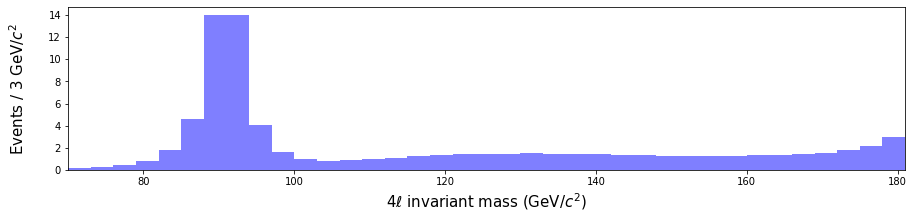

In [6]:
# BRUIT DE FOND 1 : PAIRE DE BOSONS Z #

plt.figure(figsize = (15,3))

# À COMPLÉTER #
# Diagramme en barres : processus "Paire de bosons Z"
plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black', alpha = 0.5)
#
# Intervalle de masse invariante
plt.xlim(rmin,rmax)

plt.xlabel('4$\ell$ invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Events / 3 GeV/$c^2$\n', fontsize = 15)
plt.show()

Vous devez pouvoir observer un pic autour de la masse du boson Z (91 GeV/$c^2$), un intervalle où la distribution est quelque peu plate, puis à nouveau le début d'un pic autoure de deux fois la masse du boson Z. En effet, le boson Z peut être produit "hors couche de masse", c'est-à-dire avec une déviation dans la valeur de sa masse (voir activité du niveau 3). Chaque boson Z se désintègre en paire de leptons.

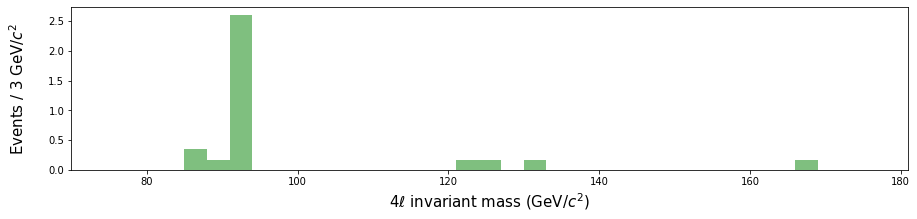

In [7]:
# BRUIT DE FOND 2 : PROCESSUS DRELL-YAN #

plt.figure(figsize = (15,3))

# À COMPLÉTER #
# Diagramme en barres : processus "Drell-Yan"
plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black', alpha = 0.5)
#
# Intervalle de masse invariante
plt.xlim(rmin,rmax)

plt.xlabel('4$\ell$ invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Events / 3 GeV/$c^2$\n', fontsize = 15)
plt.show()

Vous devez pouvoir observer un pic autour de la masse du boson Z, car ce processus peut produire, entre autres, un boson Z, qui se désintègre de façon indirecte en 4 leptons.

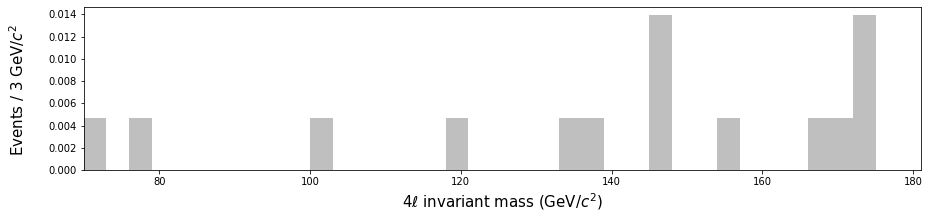

In [8]:
# BRUIT DE FOND 3 : PAIRE DE QUARKS TOP #

plt.figure(figsize = (15,3))

# À COMPLÉTER #
# Diagramme en barres : processus "Paire de quarks top"
plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b', alpha = 0.5)
#
# Intervalle de masse invariante
plt.xlim(rmin,rmax)

plt.xlabel('4$\ell$ invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Events / 3 GeV/$c^2$ \n', fontsize = 15)
plt.show()

On observe quelques évènements. Les quarks top ont une chaîne de désintégration en plusieurs étapes, qui produit toutes sortes de particules, dont des leptons.

### 2.3) Superposition des bruits de fond

Visualisons maintenant la distribution de masse invariante produite par l'ensemble des processus de bruits de fond.

**Complétez à nouveau chaque appel de la fonction "plt.bar" avec le nom de la liste de valeurs correspondante définie à la section 2.1.**

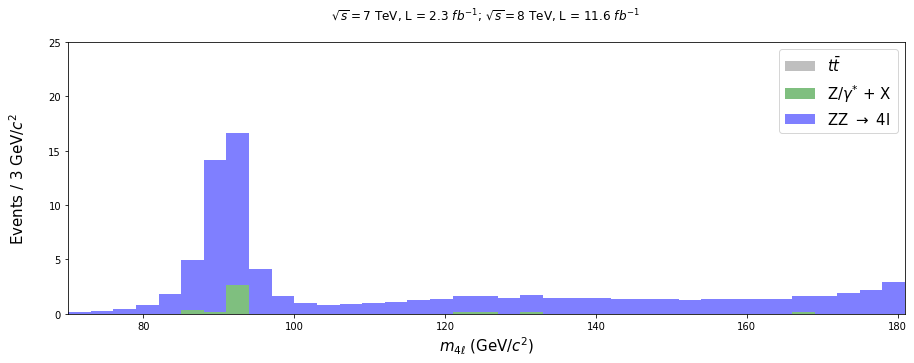

In [9]:
plt.figure(figsize = (15,5))

# À COMPLÉTER #

# Intervalle de masse
plt.xlim(rmin,rmax)
plt.ylim(0,25)

# Processus : paire de quarks top
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# Processus : Drell-Yan
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# Processus : Paire de bosons Z
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# Titres
plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4\ell}$ (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Events / 3 GeV/$c^2$\n', fontsize = 15)

# Ajouter une légende incluant les informations indiquées par la variable "label" de la fonction "plt.bar()"
plt.legend(fontsize = 15)

plt.show()

### 2.4) Signal

Nous pouvons maintenant visualiser la distribution de masse invariante prédite théoriquement pour un boson de Higgs de masse égale à 125 GeV/$c^2$.

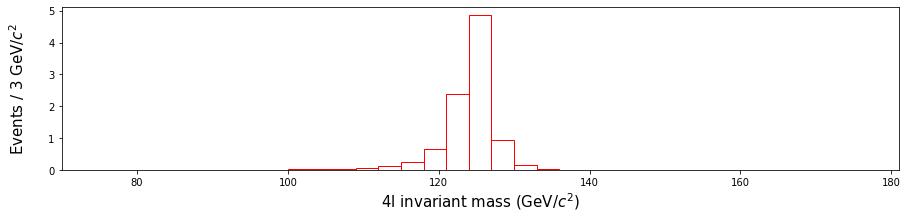

In [10]:
# Processus : signal H --> ZZ --> 4 leptons

plt.figure(figsize = (15,3))
plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r')

plt.xlabel('4l invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Events / 3 GeV/$c^2$\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

Nous observons bien un pic autour de la valeur nominale de la masse choisie pour cette prédiction théorique. Rappelons ici que la largeur de cette distribution est due à deux effets combinés (voir Niveau 3) :
- la "largeur naturelle", qui correspond aux fluctuations quantiques sur la masse d'une particule ;
- la résolution expérimentale sur la mesure de la masse invariante.

## 3) Comparaison entre observations et prédictions

Nous allons étudier la compatibilité entre les nombres d'évènements observés et prédits. À cette fin, nous allons compléter les points de données expérimentales par des barres d'erreur horizontales (largeur des _bins_) et verticales. Ces dernières correspondent à l'incertitude sur le nombre d'évènements obtenus dans chaque _bin_.

Les collisions de particules présentent une nature stochastique, décrite par des distributions de probabilité suivant les propriétés quantiques et les variables cinématiques des particules entrantes, échangées et sortantes impliquées dans le processus.

Pour une intensité et une durée de collisions fixées, le nombre d'évènements obtenus dans un intervalle de masse invariante donné est une variable aléatoire discrète. La distribution de probabilité correspondante est la loi de Poisson, pour laquelle la variance est égale à la moyenne. Ainsi, on considèrera qu'un nombre d'évènements N est issu d'une distribution de Poisson de moyenne N et d'écart type $\sqrt{N}$.

### 3.1) Distribution de masse invariante

**Complétez à nouveau chaque appel de la fonction "plt.bar" avec le nom de la liste de valeurs correspondante définie à la section 2.1. Complétez également le calcul des erreurs verticales "yerrs" en appliquant la fonction "np.sqrt()" à l'histogramme "hData".**

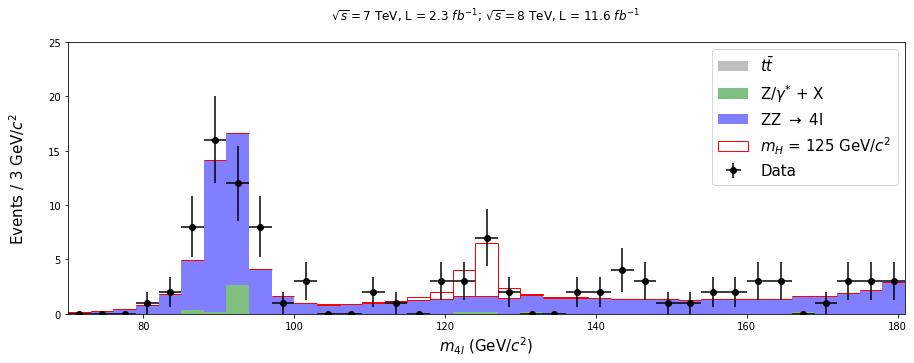

In [11]:
plt.figure(figsize = (15,5))

# À COMPLÉTER : 4 appels à "plt.bar()" ci-dessous #

# Processus : paire de quarks top
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# Processus : Drell-Yan
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# Processus : Paire de bosons Z
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# Processus : signal H --> ZZ --> 4 leptons
hzz_bar = plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r',
                  bottom = ttbar+dy+zz, label = '$m_{H}$ = 125 GeV/$c^2$')

# DONNÉES EXPÉRIMENTALES #

# barre d'erreur horizontale : largeur du bin
xerrs = [width*0.5 for i in range(0, nbins)] 

# À COMPLÉTER : barre d'erreur verticale #
yerrs = np.sqrt(hData)

# Histogramme
data_bar = plt.errorbar(center, hData, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

# Titres, intervalles, légende
plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Events / 3 GeV/$c^2$\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

### 3.2) Interprétation statistique

Nous pouvons maintenant comparer la compatibilité entre les nombres d'évènements observés et prédits dans deux hypothèses : 
- l'hypothèse du "bruit de fond seul", nommée généralement **"hypothèse nulle"** ;
- l'hypothèse "bruit de fond plus signal".

Nous allons étudier la compatibilité dans un intervalle de masse réduit : **[121, 130]** GeV/$c^2$.

**Instructions :**
1) Calculez la somme du nombre d'évènements où la masse invariante "M" prend une valeur appartenant à [120;130] pour chaque distribution (données, Drell-Yan, Paire de quarks top, Paire de bosons Z, signal HZZ).

2) Sommez les nombres d'évènements de **bruit de fond**.

3) Calculez l'incertitude Poissonienne sur le nombre d'évènements observés dans les données expérimentales.

4) Évaluez la compatibilité entre les nombres d'évènements observés et prédits (bruit de fond uniquement) au moyen d'un z-score.

5) Évaluez la compatibilité entre les nombres d'évènements observés et prédits (bruit de fond plus signal) au moyen d'un z-score.

In [15]:
# Correction

# Intervalle local
localInf = 121 # À COMPLÉTER
localSup = 130 # À COMPLÉTER

# Données observées #
nData = sum( (data['M']>=localInf) & (data['M']<=localSup) ) 
print("nData =",nData)

# Prédictions : bruit de fond seul #
n_dy = n_zz = n_ttbar = n_total_B = n_signal = 0 # initialisation des compteurs à 0
iBin = -1 # pour indexer les bins

# boucle sur les centres des bins définis au début de l'activité
for c in center:
    iBin += 1                   # l'index des bins commence à 0
    lowerEdge = c - width/2     # borne inférieure du bin
    upperEdge = c + width/2     # borne supérieure du bin

    # À COMPLÉTER : les bins doivent être compris dans l'intervalle de masse considéré
    if(lowerEdge>=localInf and upperEdge<=localSup):
        print("Bin : [",lowerEdge, ";", upperEdge, "]") # pour vérifier les bins inclus dans le calcul
        n_dy     += dy[iBin]
        n_ttbar  += ttbar[iBin]
        n_zz     += zz[iBin]
        n_signal += hzz[iBin]
        
# À COMPLÉTER : sommez les nombres d'évènements des processus de bruit de fond
n_total_B = n_dy + n_ttbar + n_zz

print("n_dy =", n_dy, " ; n_ttbar=", n_ttbar, " ; n_zz = ", n_zz)
print("n_total_B = ", n_total_B)
print("n_signal = ", n_signal)

# À COMPLÉTER #

# calcul de l'incertitude poissonienne sur nData
uData = np.sqrt(nData)

# calcul du z-score : bruit de fond seul
zScore = abs(nData - n_total_B) / uData
print("\n")
print("HYPOTHÈSE H0 : Bruit de fond seul : zScore = ", zScore)

# calcul du z-score : bruit de fond plus signal
zScore = abs(nData - n_total_B - n_signal) / uData
print("HYPOTHÈSE H1 : Bruit de fond + signal : zScore = ", zScore)

nData = 12
Bin : [ 121.0 ; 124.0 ]
Bin : [ 124.0 ; 127.0 ]
Bin : [ 127.0 ; 130.0 ]
n_dy = 0.354796  ; n_ttbar= 0.0  ; n_zz =  4.30043
n_total_B =  4.655226000000001
n_signal =  8.203648999999999


HYPOTHÈSE H0 : Bruit de fond seul : zScore =  2.120253623018482
HYPOTHÈSE H1 : Bruit de fond + signal : zScore =  0.24793585622511974


Afin d'interpréter ce z-score, nous allons calculer la probabilité d'observer ce nombre d'évènements dans les données expérimentales sous chaque hypothèse. Schématiquement, il s'agit des probabilités conditionnelles p(nData | H0) et p(nData | H1).

Cette probabilité peut être évaluée en intégrant les queues d'une distribution normale (gaussienne de moyenne et d'écart-type égaux à 1) au-delà de "zScore" déviations standard.

**Questions :**

1) À quel niveau de probabilité peut-on exclure l'hypothèse H0 "bruit de fond seul" ?

2) Peut-on exclure l'hypothèse "bruit de fond + signal" ?

In [13]:
# CODE POUR GAUSS INTEGRAL ? FIXME


#### Épilogue

En physique des particules, on considère deux seuils statistiques : 3 déviations standards pour une "mise en évidence" (_evidence_ en anglais, à ne pas confondre avec _proof_) et 5 déviations standards pour une découverte. Ces seuils correspondent respectivement à une probabilité de 0,3% et $3\times 10^{-7}$ qu'une fluctuation statistique explique une déviation entre observation et prédiction.

Nous ne disposons pour cette activité que d'un sous-ensemble des données enregistrées en 2011 (45%) et en 2012 (59%). De plus, l'analyse réelle emploie des méthodes de traitement de données et d'interprétation statistiques plus élaborés que l'approche simplifiée suivie ici. Celle-ci a essentiellement valeur d'illustration.